# Hypothesis Testing for Means

# Two sample hypothesis test

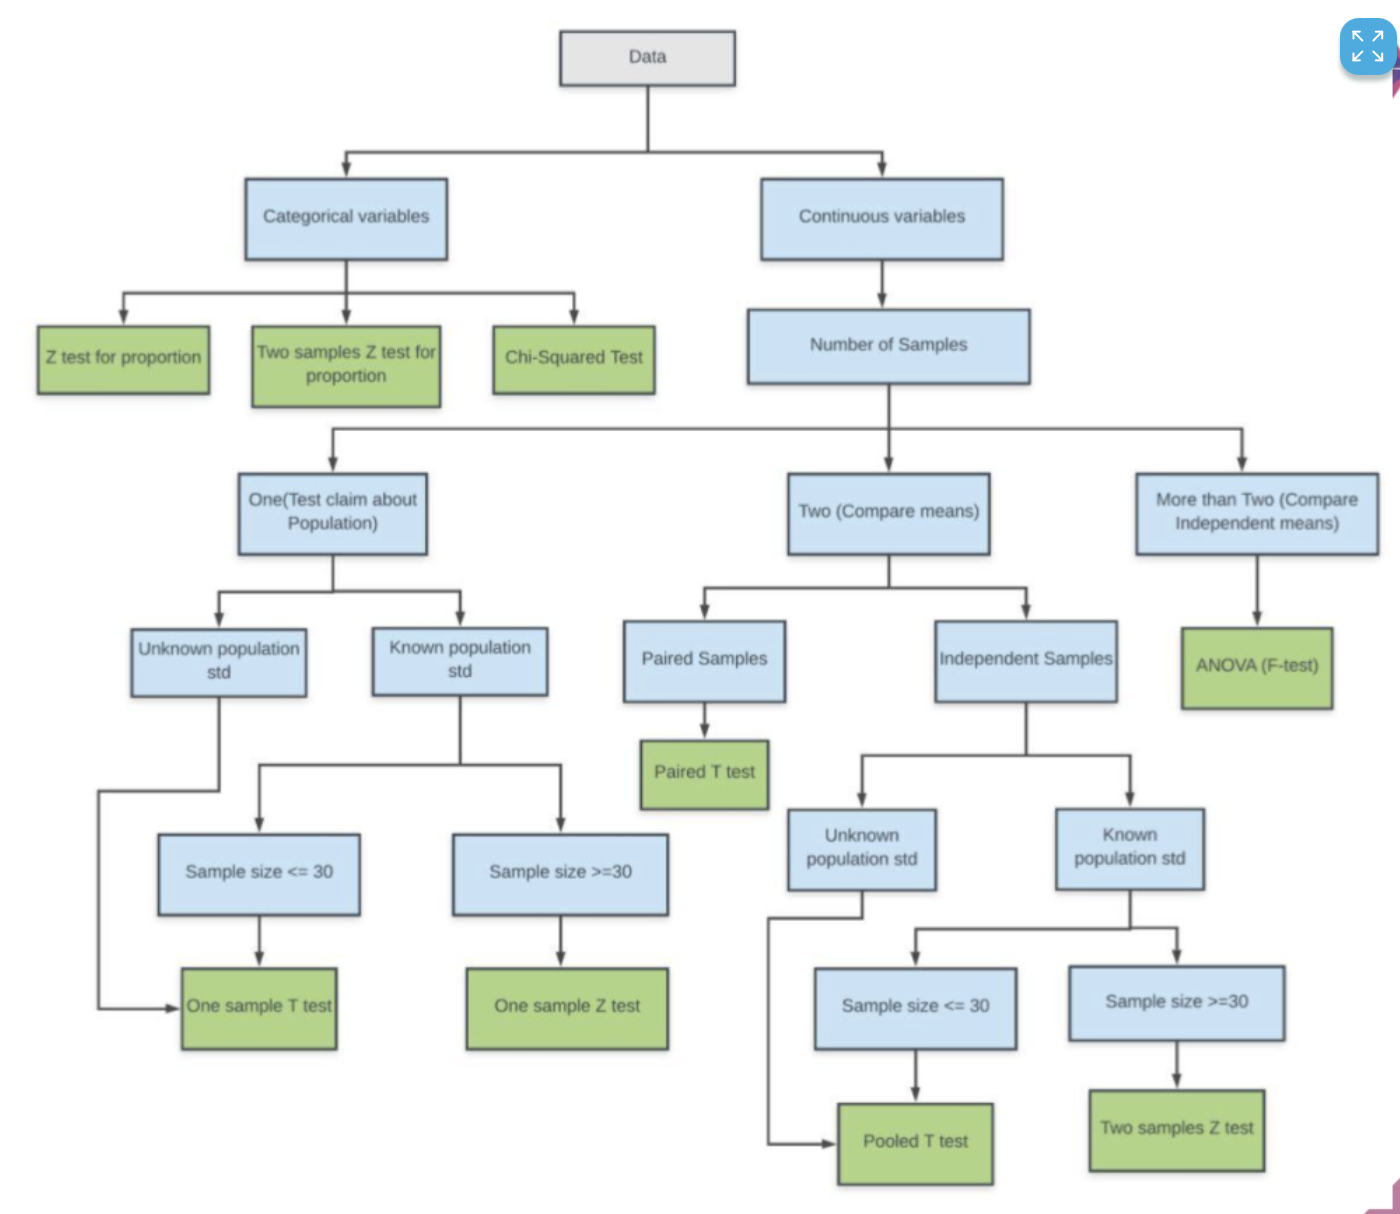

# Independent Samples T Test

The independent-samples t-test (or independent t-test) compares the means between two independent groups on the same continuous, dependent variable.

For example, we can answer the following research question by using the independent-samples t-test. Does first year graduate salaries differ based on gender?

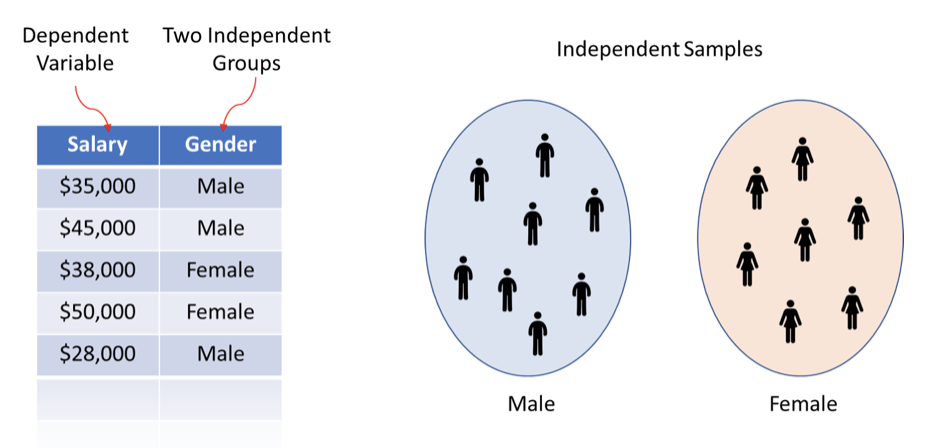

Dependent variable would be "first year graduate salaries" and independent variable would be "gender", which has two groups: "male" and "female"


For the independent samples t test, the **denominator in the t test formula is the estimated standard error of the difference between means.** Since the statistic in question is the difference between means, the denominator is the estimated standard error of the difference between means.

Bu test, iki bağımsız grubun ortalamalarının birbirinden önemli ölçüde farklı olup olmadığını inceler.
Burada kritik olan nokta gruplara dahil olma şartının incelenen değişkenden tamamen bağımsız olmasıdır. Başka bir deyişle karşılaştırılan iki grup (ya da iki örneklem) BİRBİRİ İLE İLİNTİLİ OLMAMALIDIR.
Örneğin bir çalışmada kadınlar ile erkeklerin ortalama gelirlerinin farklı olup olmadığı, bir medikal araştırmada iki farklı ilaç tedavisi gören hastaların vücut kitle endekslerinin (BMI) farklılık gösterip göstermediği, bir kanser ilacı deneme araştırmasında kontrol (plasebo) ve deney (ilaç) gruplarının tümör büyüklüğü bakımından fark gösterip göstermediği gibi.

# 1. Assumptions

- A quantitative response variable for two groups
- Independent random samples, either from random sampling or a randomized experiment
- Approximately normal population distribution for each group. (This is mainly important for small sample sizes, and even then the two-sided test is robust to violations of this assumption.)

# 2. Hypotheses

- 𝐻0:μ1=μ2 (No difference between the means of the two groups)
- Two-sided: 𝐻𝑎:μ1≠μ2 (Significant difference between the means of the two groups)
- One-sided: 𝐻𝑎:μ1>μ2

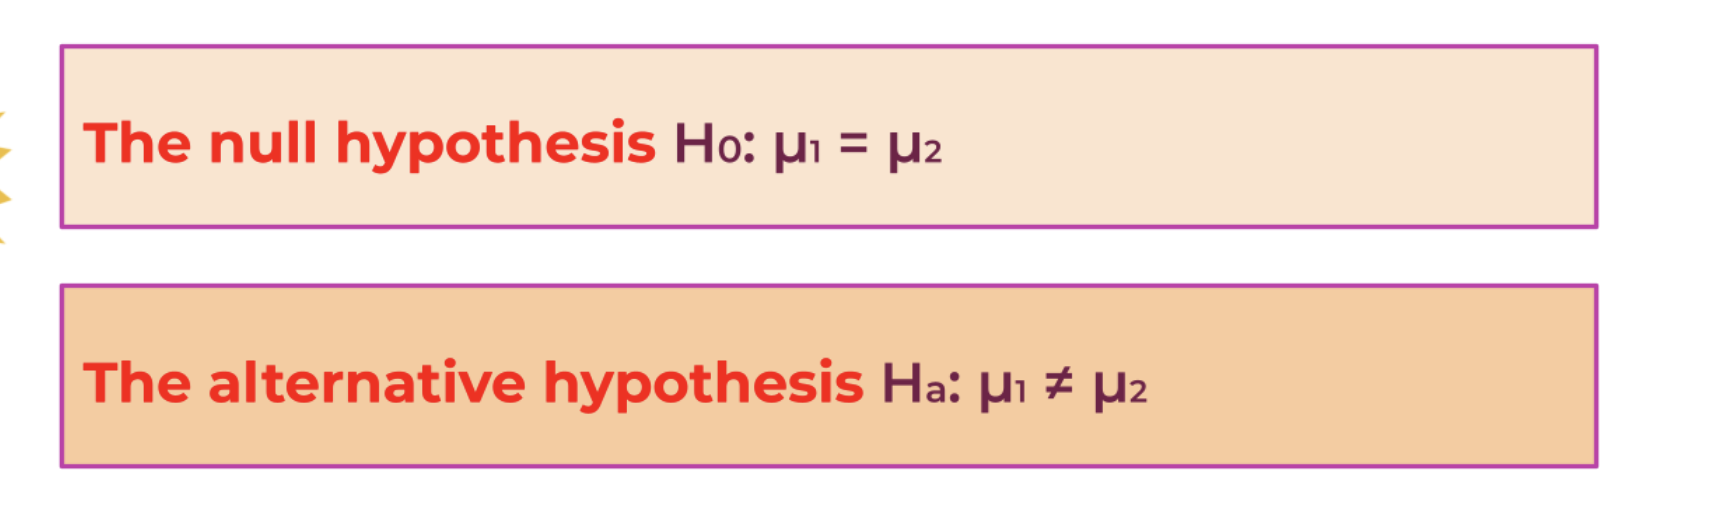

# 3. Test Statistic

- Python code

The calculated t value is then compared to the critical; t value from the t distribution table with degrees of freedom; df = n1 + n2 - 2 and chosen confidence level.

Traditional formulas below (end of this cell)


# 4. P-value
P_value = Two-tail probability from t distribution of values even more extreme than observed t test statistic, presuming the null hypothesis is true with df given by software.

# 5. Conclusion

Smaller P-values give stronger evidence against 𝐻0 and supporting 𝐻𝑎. 

Interpret the P-value in context, and if a decision is needed, reject 𝐻0 if P-value ≤ significance level (such as 0.05).



**Tips:**

- Levene’s test is commonly used to check for homogeneity of variance.
- If Levene’s test indicates that the variances are equal across the two groups (i.e., p-value large), we will assume Equal variances.

How to calculate test statistic manually: 

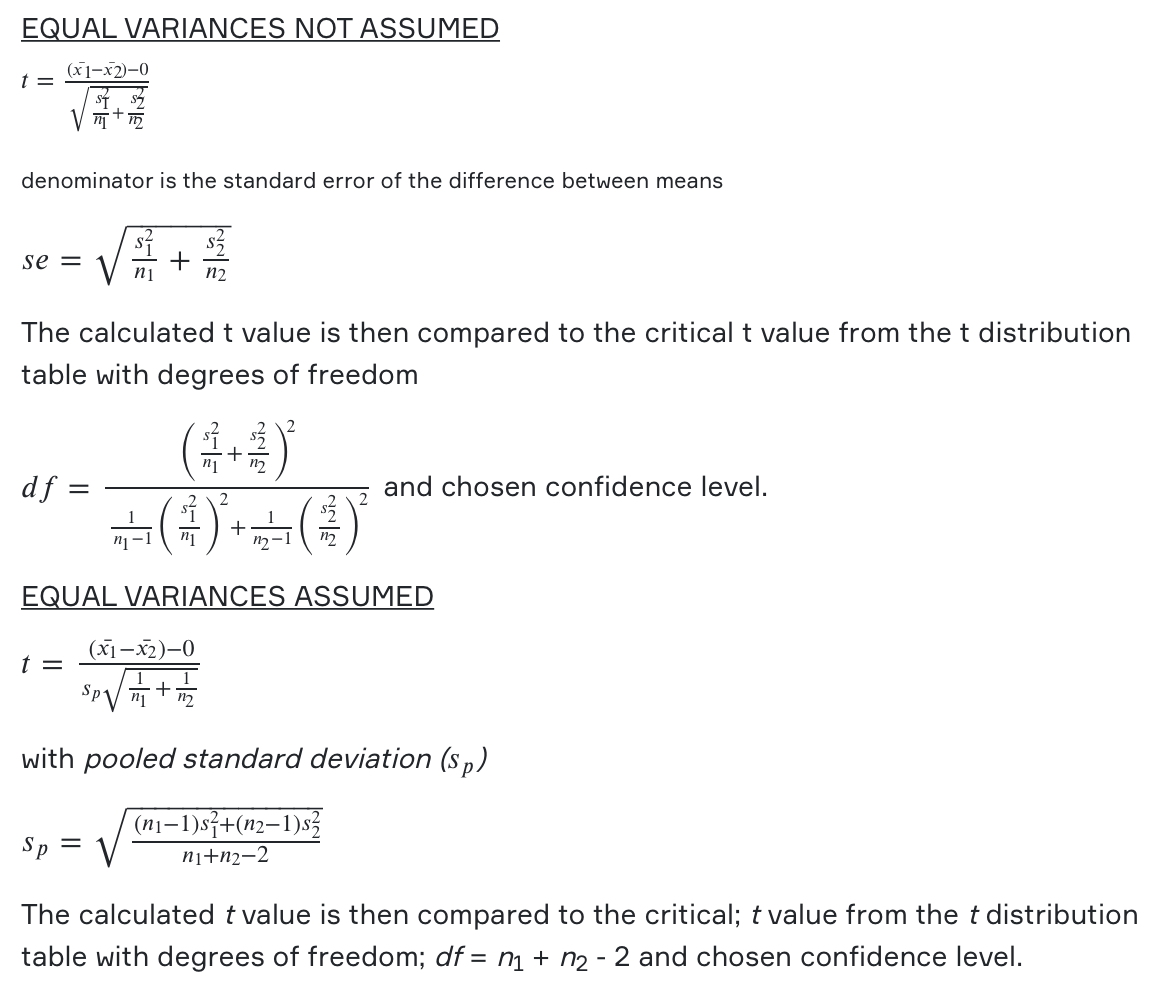




# Independent Samples T Test using SciPy

Example:

To reach maximum efficiency in performing an assembly operation in a manufacturing plant, new employees require approximately a 1-month training period. A new method of training was suggested, and a test was conducted to compare the new method with the standard procedure. Two groups of nine new employees each were trained for a period of 3 weeks, one group using the new method and the other following the standard training procedure. The length of time (in minutes) required for each employee to assemble the device was recorded at the end of the 3-week period. The resulting measurements are as shown below in Table. 

Is there sufficient evidence to indicate a difference in true mean assembly times for those trained using the two methods? Test at the α = .05 level of significance.

We are testing 𝐻0:μ1=μ2 against the alternative 𝐻𝑎:μ1≠μ2 = 0.

In [1]:
import numpy as np
from scipy import stats

In [2]:
standard = np.array([32, 37, 35, 28, 41, 44, 35, 31, 34])
new = np.array([35, 31, 29, 25, 34, 40, 27, 32, 31])


print("Standard Procedure:", standard)
print("New Procedure:", new)

Standard Procedure: [32 37 35 28 41 44 35 31 34]
New Procedure: [35 31 29 25 34 40 27 32 31]


In [3]:
# 1) Calculate test statistics and p-value using stats.ttest_ind():

stats.ttest_ind(standard, new, equal_var=True, alternative='two-sided')   #assumes equal population variances

# stats.ttest_ind() dcostringi faydali cok


# Result: There is insufficient evidence to indicate a difference in the mean assembly times 
# for the two training periods at the α = .05 level of significance.

Ttest_indResult(statistic=1.6494846165734016, pvalue=0.11853980248116995)

In [4]:
# an alternative way: Calculate test statistics and p-value using stats.ttest_ind_from_stats:
stats.ttest_ind_from_stats(mean1=np.mean(standard), 
                           std1=np.std(standard, ddof=1), 
                           nobs1=np.size(standard),
                           mean2=np.mean(new)     , 
                           std2=np.std(new, ddof=1),      
                           nobs2=np.size(new))


Ttest_indResult(statistic=1.6494846165734016, pvalue=0.11853980248116995)

In [6]:
# EXAMPLE 2: asıl bunları kullanacagız

# vücut sıcaklıklarında gender etkisi var mi?

In [7]:
men=[96.9, 97.4, 97.5, 97.8, 97.8, 97.9, 98, 98.6, 98.8]
women = [97.8, 98, 98.2, 98.2, 98.2, 98.6, 98.8, 99.2, 99.4]

In [8]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [9]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.(equal_var = False)
#The large p-value suggests that the populations have equal variances.(equal_var = True) 
# yüksek ciktigi icin asagda eq var True diyecegiz. 0.05 ile karsilastiriyoruz her zaman düsük mü yüksek mi anlamak icin
leveneTest = stats.levene(men, women)
leveneTest
# statistic dedigi t test, critical value. bunu .statistic attribute ile de bulabilriiz (asagida)

LeveneResult(statistic=0.0031923383878696503, pvalue=0.9556424422138867)

In [10]:
# average men
np.mean(men)

97.85555555555555

In [11]:
# average women
np.mean(women)

# iki mean arası bir fark var anlasiliyor. ama istatistiksel olarak anlamlı bir fark mı bu, ana sorumuz bu, ondan t-test

98.48888888888888

In [12]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [13]:
#help(stats.ttest_ind)

In [14]:
# Calculate test statistics using stats.ttest_ind()
# equal variances True mu False mu oldugunu levene testt ile anlayacagiz. Ama arada 3-5% fark var.
indTest = stats.ttest_ind(men, women, equal_var = True)
indTest

Ttest_indResult(statistic=-2.3724271468993643, pvalue=0.03054788637798765)

In [15]:
indTest.statistic

-2.3724271468993643

In [16]:
indTest.pvalue

0.03054788637798765

In [17]:
# Decision

#  fark istatistiksel olarak anlamlı mı? yoksa bu iki değer birbirine eşit kabul edilebilir mi? 
# Bunu bir değeri baz alarak söyleyebiliyoruz. O değer α - significance level (anlamlılık seviyesi) dir.

alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null. At the α=0.05, we have sufficient evidence to indicate that mean body temperatures differ for men and women. ")
else:
    print("Fail to reject the null.")
    
# istatistiksel olarak anlamlı bir farkmis.

Reject the null. At the α=0.05, we have sufficient evidence to indicate that mean body temperatures differ for men and women. 


**Example 2**

**Arsenic example**

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [34]:
#Import arsenic dataset
# arsenic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/data_for_session_6/arsenic.csv")
import pandas as pd
arsenic = pd.read_csv("arsenic.csv")

In [35]:
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [36]:
arsenic.columns

Index(['Metro Phoenix', 'x1', 'Rural Arizona', 'x2'], dtype='object')

In [37]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [38]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest
# p v 0.5ten kucuk ciktigi icin false yazacagiz eq var parametresine

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

In [39]:
# average Metro Phoenix
arsenic.x1.mean()

12.5

In [40]:
# average Rural Arizona
arsenic.x2.mean()

27.5

Calculate the T-test for the means of two independent samples of scores.

In [41]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var= False)
indTest

# istatistik degeri 2.7, yani meanden diger tarafa 2.7 kat gidince nerdeyse cok kucuk bir alan kalıyor
# o alan pvalue ile belirlenen alan. bu ornekte oldugu gibi cok dusuk o da

Ttest_indResult(statistic=-2.7669395785560553, pvalue=0.0158272848161009)

In [42]:
indTest.statistic

-2.7669395785560553

In [43]:
indTest.pvalue

0.0158272848161009

In [44]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


# Dependent (paired) T Test

The dependent t-test (or the paired-samples t-test) compares the means between two related groups on the same continuous, dependent variable. 

For example, we can answer the following research question by using the dependent t-test.

Is there statistical difference in smokers' daily cigarette consumption before and after a 6 week hypnotherapy programme?

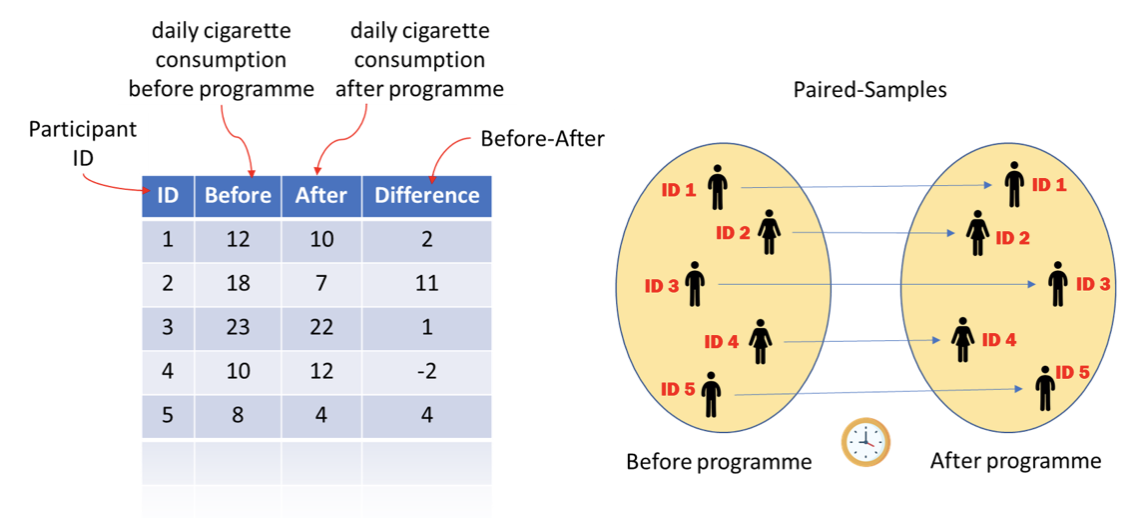

Dependent variable would be "daily cigarette consumption" and two related groups would be the cigarette consumption values "before" and "after" the hypnotherapy programme.

bir olayin oncesi ve sonrasi, yeni bir uygulamanin (kanunun) sucu azaltmaya etkisi, kanunun uygylamada onceki suc sayilari sonrasi suc sayilari...

1 restaurantın iki farklı gundeki cirosu icin dependent; 2 farklı restaurantın meanleri comparing icin independent.

Bu test, bir grup insana aynı anketi iki kez verdiğiniz zaman içindir. Eşleştirilmiş bir t-testi, birinci ve ikinci anket arasında ortalamanın değişip değişmediğini size bildirir.
En tipik örneği aynı deneğin birden fazla teste tabi tutulduğu durumlarda ilk örnek ile sonraki örneklerin karşılaştırılması için kullanılmasıdır. Örneğin bir tedavi protokolü başlamadan önce kilosu ölçülen hastaların tedavi bitiminde ölçülen kilosu ile karşılaştırılması için bağımlı örneklem t-testi uygulanır.
Bağımsız örneklem testinden (Independent Two-sample testinden) farkı önce ve sonra değerlerinin her denek için eşleştirilerek aradaki farkın tüm örneklem için istatistiki olarak bir fark gözetip gözetmediğinin incelenmesidir. İki farklı normal dağılımdan çekilmiş iki farklı örneklem olduğu varsayılmaz. Tek bir normal dağılımdan elde edilen bir örneklem test edilir. 

# 1. Assumptions

- The dependent variable is continuous, and it is measured twice on the same sample of subjects.
- The independent variable should consist of two categorical, "related groups" or "matched pairs".
- The difference between the scores of the variables are normally distributed.

# 2. Hypotheses

- 𝐻0:μ1−μ2=0 (the difference between the paired population means is equal to 0)
- Two-sided: 𝐻𝑎:μ1−μ2≠0 (the difference between the paired population means is not 0)
- One-sided: 𝐻𝑎:μ1>μ2 or  𝐻𝑎:μ1<μ2

# 3. Test Statistic

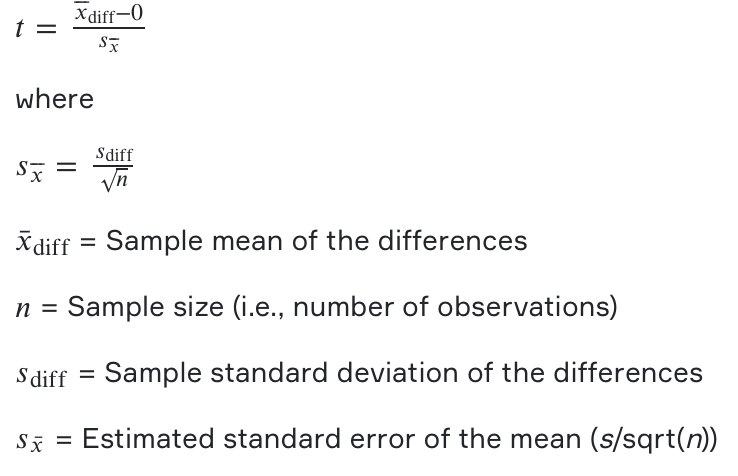

# 4. P-value

P-value = Two-tail probability from t distribution of values even more extreme than observed t test statistic, presuming the null hypothesis is true with df given by software.

# 5. Conclusion

- Smaller P-values give stronger evidence against 𝐻0 and supporting 𝐻𝑎
- Interpret the P-value in context, and if a decision is needed, reject 𝐻0 if P-value ≤ significance level (such as 0.05).

Example: 

Twelve athletes were each given two different exercise routines, and their heartbeats were monitored closely. The aim of the study was to test for a difference in the effect of the routines on heartbeat rate. The twelve differences were (in appropriate units):

𝑑𝑖 : 1.5 2.3  4.7  6.1  -1.2  2.6  1.5  -0.4  -2.7  1.9  1.1  -1.5.

Elementary calculations give: ∑𝑑𝑖 = 15.9 and ∑𝑑2𝑖= 91.81.) Assuming the differences are normally distributed, provide the test statistic from the appropriate 𝑡-test.
    

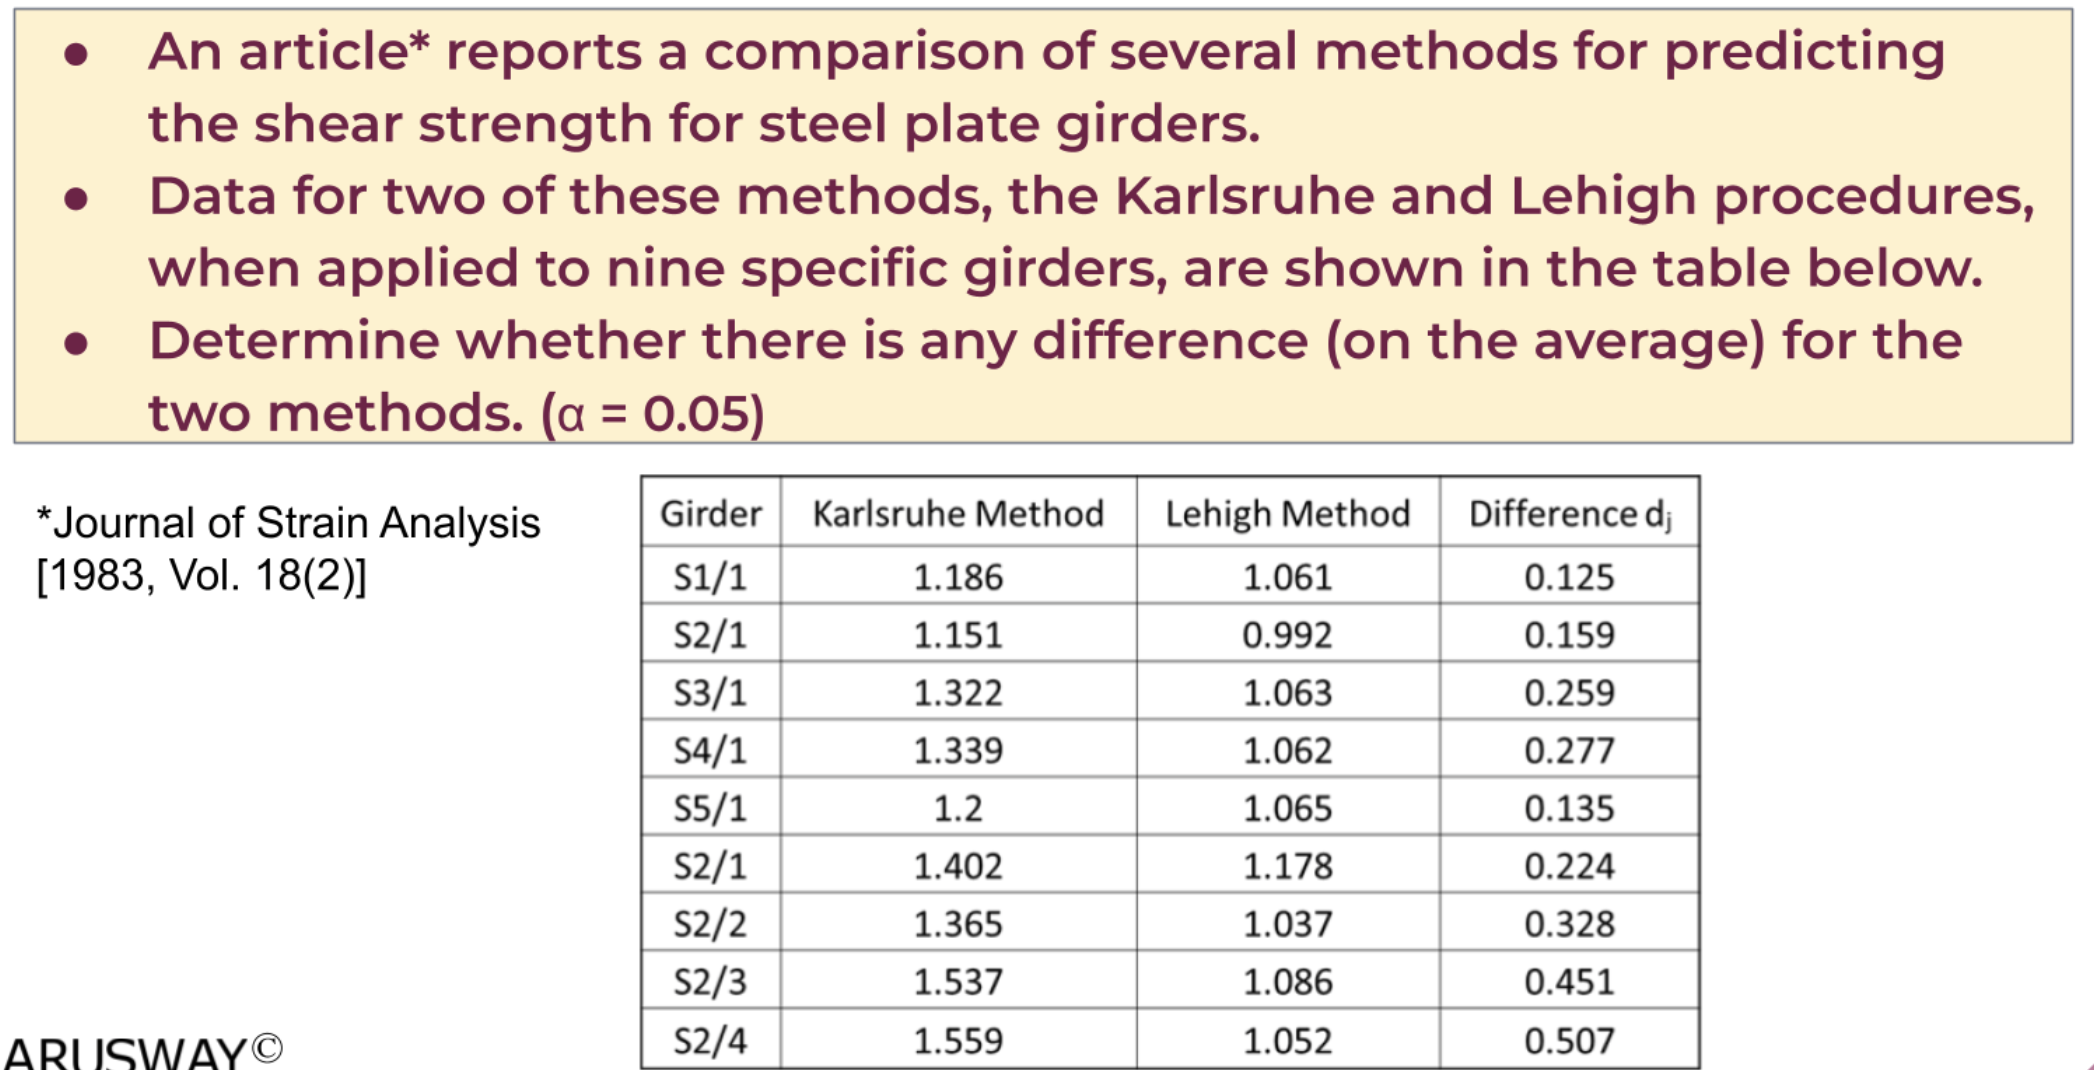

In [18]:
karlsruhe=[1.186, 1.151, 1.322, 1.339, 1.2, 1.402, 1.365, 1.537, 1.559]
lehigh=[1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052] 

In [19]:
# H0: d_bar = 0
# H1: d_bar != 0

In [20]:
# Calculate test statistics using stats.ttest_rel()  
pairedtest = stats.ttest_rel(karlsruhe, lehigh)
pairedtest

# pi value cok cok kücük

TtestResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066, df=8)

In [21]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null. The data indicate that the Karlsruhe method produces, on the average, higher strength predictions than does the Lehigh method")
else:
    print("Fail to reject")
    
# bu fark istatistiksel olarak anlamlı

Reject the Null. The data indicate that the Karlsruhe method produces, on the average, higher strength predictions than does the Lehigh method


**Example 2**

**PROZAC DATA**

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data.
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20.
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect).
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use 0.05

In [45]:
# read prozac dataset
prozac = pd.read_csv("prozac.csv")

In [46]:
prozac
# aynı hastalar oncesi-sonrası. dolayısıyla paired sample t test

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [47]:
# moodpost - moodpre
# H0: d_bar = 0
# H1: d_bar > 0

In [48]:
# Calculate test statistics using stats.ttest_rel()  
# moodpost - moodpre
pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative = "greater")
# afteri once yazdığımız icin greater dedik, pre once koysak less derdik, asagidaki gibi
pairedtest

TtestResult(statistic=3.1428571428571423, pvalue=0.006872912197394244, df=8)

In [49]:
# moodpre - moodpost
# H0: d_bar = 0
# H1: d_bar < 0
#stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative="less")

In [50]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [51]:
#That means prozac treatment gives good results.

# One-Way ANOVA

The inferential method for comparing means of several groups is called analysis of variance, denoted ANOVA. ANOVA with a single factor is called one-way ANOVA.

Both the One-Way ANOVA and the Independent Samples t Test can compare the means for two groups. However, only the One-Way ANOVA can compare the means across three or more groups.

For example, we can answer the following research question by using the one-way ANOVA.

Is there a statistically significant difference in sprint time with respect to smoking status  (0 = Nonsmoker, 1 = Past smoker, 2 = Current smoker)?

Sprint time will serve as the dependent variable, and smoking status will act as the independent variable.

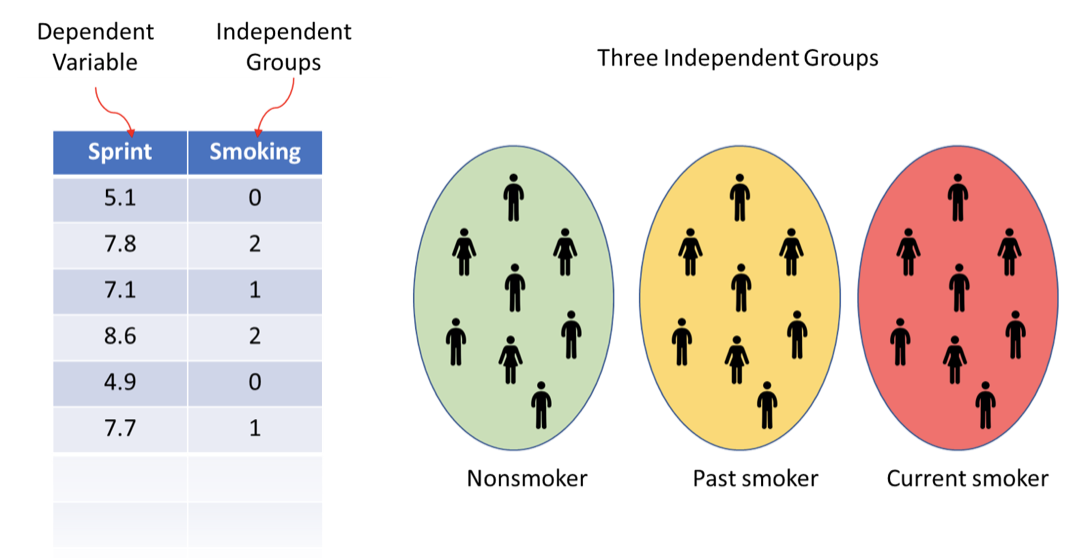



# 1. Assumptions

- Dependent variable that is continuous (i.e., interval or ratio level)
- Independent variable that is categorical (i.e., two or more groups)
- Independent samples/groups (i.e., independence of observations)
- Normal distribution (approximately) of the dependent variable for each group (i.e., for each level of the factor)
- Homogeneity of variances (i.e., variances approximately equal across groups)

# 2. Hypotheses

- 𝐻0:μ1=μ2=μ3=...=μ𝑘 (all k population means are equal)
- 𝐻𝑎: At least one μ𝑖 different  (at least one of the k population means is not equal to the others)

where

- μi is the population mean of the ith group (i = 1, 2, ..., k)

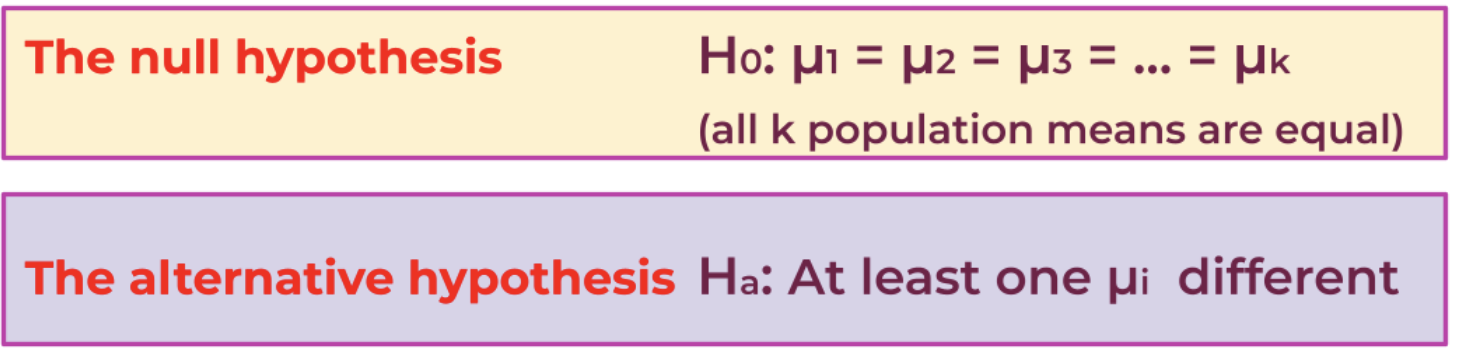

# 3. Test Statistic

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different. Because the computation of the F statistic is slightly more involved than computing the paired or independent samples t test statistics, it's extremely common for all of the F statistic components to be depicted in a table like the following:

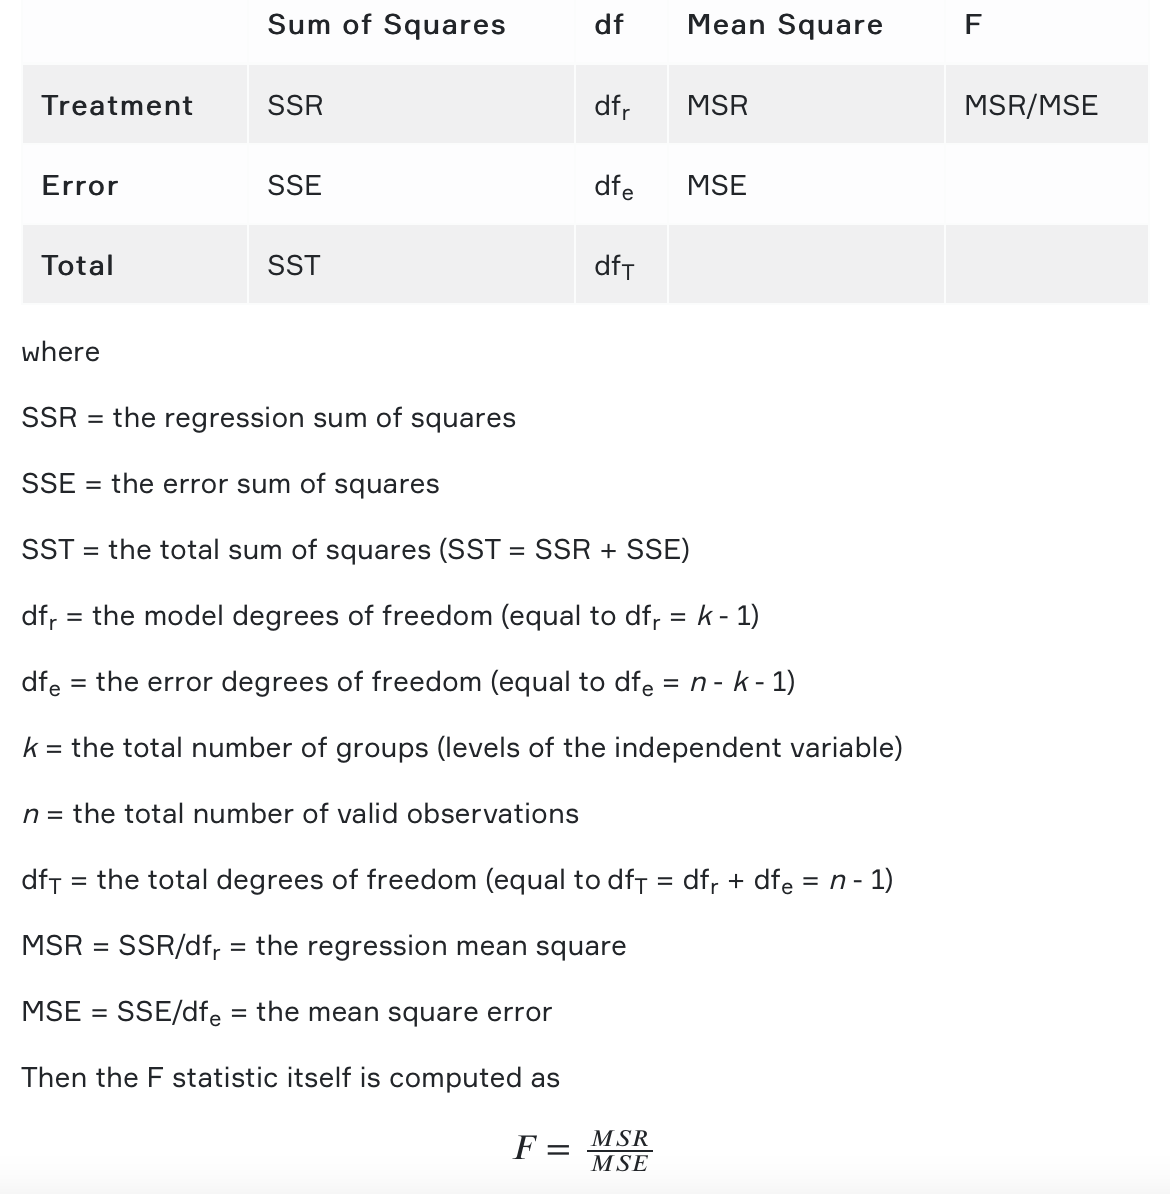

Mean squares are estimates of variance within groups or across groups. Mean squares are used to calculate F ratios.

# 4. P-value

Because we’re only examining random samples of data pulled from whole populations, there’s a risk that the means of our samples are not representative of the means of the full populations. The p-value gives us a way to quantify that risk. It is the probability that any variability in the means of your sample data is the result of pure chance; more specifically, it’s the probability of observing variances in the sample means at least as large as what you’ve measured when in fact the null hypothesis is true (the full population means are, in fact, equal).

# 5. Conclusion

A small p-value would lead you to reject the null hypothesis. A typical threshold for rejection of a null hypothesis is 0.05. That is, if you have a p-value less than 0.05, you would reject the null hypothesis in favor of the alternative hypothesis that at least one mean is different from the rest.

Tips:

- Note that the ANOVA alone does not tell us specifically which means were different from one another.
- To determine that, we would need to follow up with **multiple comparisons (or post-hoc) tests.**

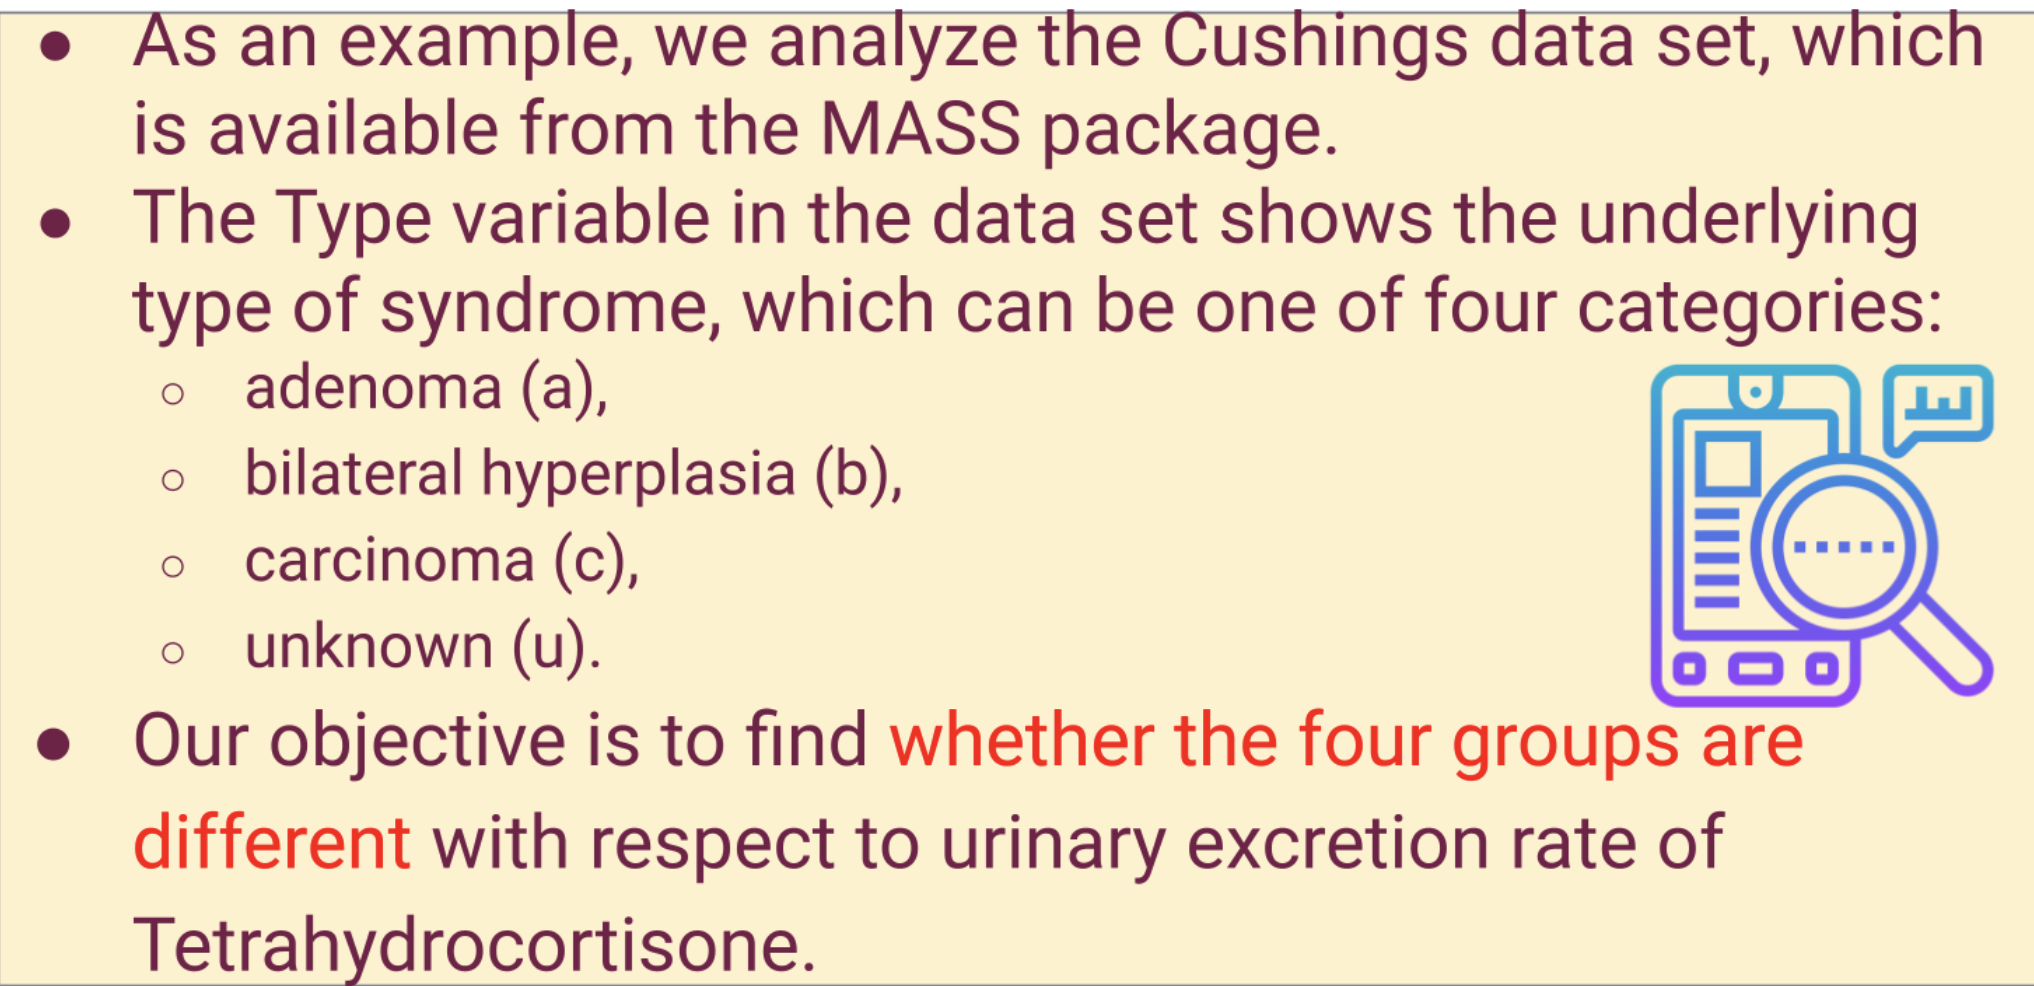

In [22]:
import statsmodels.api as sm

In [23]:
df = sm.datasets.get_rdataset(dataname = "Cushings", package = "MASS")
df.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

In [24]:
df=df.data
df.head(10)

,Tetrahydrocortisone,Pregnanetriol,Type
a1,3.1,11.70,a
a2,3.0,1.30,a
a3,1.9,0.10,a
a4,3.8,0.04,a
a5,4.1,1.10,a
a6,1.9,0.40,a
b1,8.3,1.00,b
b2,3.8,0.20,b
b3,3.9,0.60,b
b4,7.8,1.20,b


In [25]:
# H0: μ1 = μ2 = μ3 = μ4
# Ha: At least one μi is different

In [26]:
df.shape

(27, 3)

In [27]:
df.Type.unique()

array(['a', 'b', 'c', 'u'], dtype=object)

In [28]:
from scipy.stats import f_oneway

In [29]:
df.Tetrahydrocortisone[df.Type=="a"]

a1    3.1
a2    3.0
a3    1.9
a4    3.8
a5    4.1
a6    1.9
Name: Tetrahydrocortisone, dtype: float64

In [32]:
# her hasta grubu icin dataframe filtrelenir ve anova testine tabş tutulur
anova_test = f_oneway((df.Tetrahydrocortisone[df.Type=="a"]), (df.Tetrahydrocortisone[df.Type=="b"]),
         (df.Tetrahydrocortisone[df.Type=="c"]), (df.Tetrahydrocortisone[df.Type=="u"]))
anova_test

# t degil F score verir.
# 0.04 alpha 0.05ten kücüktür. yan i gruplar arası fark var.

F_onewayResult(statistic=3.2257394791378426, pvalue=0.0412182793672776)

In [31]:
# Decision
alpha = 0.05

if anova_test.pvalue < alpha:
    print("We can reject H0 at 0.05 significance level and conclude that the differences among group means are statistically significant")
else:
    print("Fail to reject")

We can reject H0 at 0.05 significance level and conclude that the differences among group means are statistically significant
